## Financial risk assessment project

In [1]:
# Importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [2]:
# reading The data
data=pd.read_csv(r"F:\DATA ANALYSIS\portfolio projects\Data\New folder\archive (1)\financial_risk_assessment.csv")
df=data.copy()
df.head()


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


## data preperation and cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [4]:
df.isnull().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

In [5]:
df.describe()

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


In [6]:
## reducing decimals in the dataframe
pd.set_option('display.float_format',lambda x:'%.3f'%x)


In [7]:
## Cheaciking for  duplicates
df.duplicated().unique()

array([False])

In [8]:
## Cheacking for the data types
df.dtypes

Age                        int64
Gender                    object
Education Level           object
Marital Status            object
Income                   float64
Credit Score             float64
Loan Amount              float64
Loan Purpose              object
Employment Status         object
Years at Current Job       int64
Payment History           object
Debt-to-Income Ratio     float64
Assets Value             float64
Number of Dependents     float64
City                      object
State                     object
Country                   object
Previous Defaults        float64
Marital Status Change      int64
Risk Rating               object
dtype: object

In [9]:
df['Income'].isnull().sum()

2250

In [10]:
#3 filtering
df[df['Income'].isnull()]

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
1,57,Female,Bachelor's,Widowed,nan,690.000,33835.000,Auto,Employed,6,Fair,0.149,55849.000,0.000,North Catherine,OH,Turkmenistan,3.000,2,Medium
5,30,Non-binary,PhD,Divorced,nan,717.000,15613.000,Business,Unemployed,5,Fair,0.296,nan,4.000,Brianland,TN,Iceland,3.000,1,Medium
12,60,Female,PhD,Divorced,nan,686.000,15497.000,Personal,Self-employed,18,Poor,0.328,47603.000,4.000,West Kelseymouth,NM,Eritrea,2.000,2,High
15,68,Female,PhD,Divorced,nan,nan,42951.000,Auto,Self-employed,6,Fair,0.551,67070.000,4.000,East Kristin,MH,Guadeloupe,2.000,2,Low
18,60,Non-binary,Bachelor's,Divorced,nan,738.000,37001.000,Business,Employed,7,Fair,0.339,53055.000,nan,Johnsonstad,MS,Malawi,1.000,2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14976,46,Male,Bachelor's,Single,nan,nan,nan,Auto,Unemployed,0,Excellent,0.131,67633.000,1.000,Chavezberg,MT,Northern Mariana Islands,1.000,2,High
14987,22,Non-binary,Master's,Divorced,nan,787.000,27325.000,Personal,Unemployed,7,Good,0.224,182721.000,1.000,Harrisport,SD,Cambodia,2.000,2,Medium
14988,35,Non-binary,Bachelor's,Widowed,nan,748.000,35786.000,Auto,Unemployed,2,Good,0.216,150172.000,3.000,Taylorshire,CO,Netherlands Antilles,1.000,2,Medium
14990,43,Non-binary,Bachelor's,Widowed,nan,nan,18138.000,Personal,Self-employed,12,Fair,0.286,137146.000,2.000,Roytown,MI,Falkland Islands (Malvinas),0.000,0,Medium


In [11]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [12]:
df['Income'].isnull().sum()

0

In [13]:
df['Credit Score']=df['Credit Score'].fillna(df['Credit Score'].mean())
df['Credit Score']

0       688.000
1       690.000
2       600.000
3       622.000
4       766.000
          ...  
14995   609.000
14996   700.000
14997   642.000
14998   638.000
14999   765.000
Name: Credit Score, Length: 15000, dtype: float64

In [14]:
df['Loan Amount']=df['Loan Amount'].fillna(df['Loan Amount'].mean())
df['Loan Amount']

0       45713.000
1       33835.000
2       36623.000
3       26541.000
4       36528.000
           ...   
14995   26187.000
14996   35111.000
14997   44369.000
14998   32752.000
14999   27450.011
Name: Loan Amount, Length: 15000, dtype: float64

In [15]:
df['Number of Dependents']=df['Number of Dependents'].fillna(df['Number of Dependents'].mean()).astype('int')
df['Number of Dependents']

0        0
1        0
2        3
3        3
4        2
        ..
14995    4
14996    2
14997    4
14998    2
14999    3
Name: Number of Dependents, Length: 15000, dtype: int32

In [16]:
df['Assets Value']=df['Assets Value'].fillna(df['Assets Value'].mean())
df['Assets Value']

0       120228.000
1        55849.000
2       180700.000
3       157319.000
4       287140.000
           ...    
14995   159741.497
14996    79102.000
14997   196930.000
14998   276060.000
14999    71699.000
Name: Assets Value, Length: 15000, dtype: float64

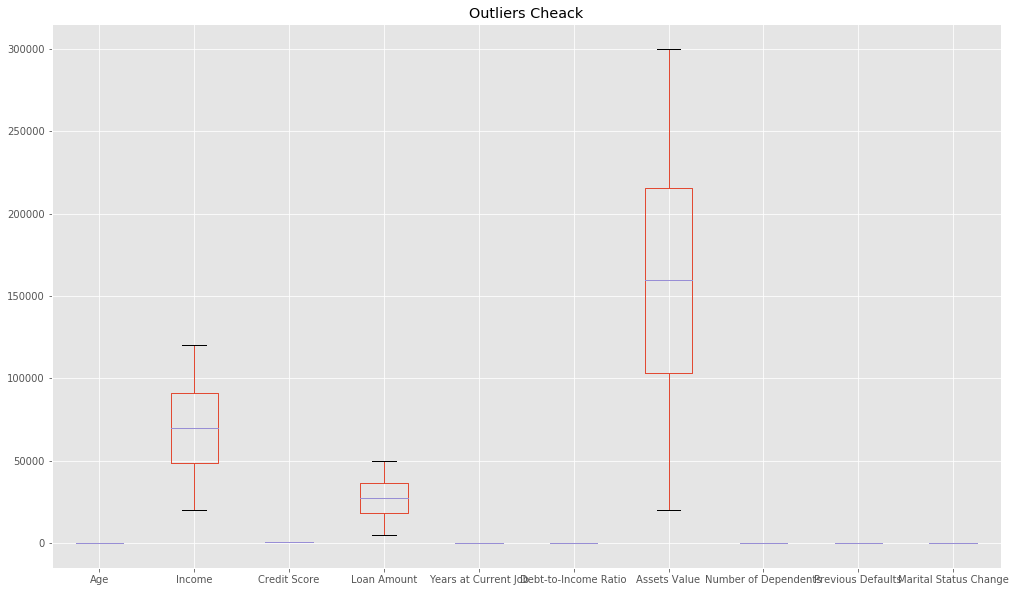

In [17]:
# Cheacking for outliers
plt.figure(figsize=(17,10))
plt.title('Outliers Cheack')
df.boxplot()
plt.show()

In [18]:
## Cheacking these outliers 
df[df['Income']>100000]

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
10,42,Non-binary,Master's,Single,116212.000,707.000,24771.000,Home,Employed,11,Excellent,0.114,212198.000,3,Matthewborough,NH,French Guiana,0.000,2,Medium
14,29,Male,High School,Divorced,119510.000,699.109,5013.000,Auto,Employed,17,Poor,0.500,50568.000,2,Deborahtown,AZ,Solomon Islands,2.000,2,Medium
17,18,Female,Master's,Widowed,102628.000,654.000,25442.000,Home,Unemployed,8,Poor,0.162,159741.497,3,West Patrick,IA,Taiwan,1.000,2,Medium
21,22,Non-binary,PhD,Widowed,100169.000,796.000,27450.011,Home,Employed,15,Poor,0.175,259802.000,3,Lake Alicia,UT,Kenya,2.000,0,Medium
23,64,Non-binary,Bachelor's,Divorced,118318.000,702.000,41029.000,Business,Unemployed,10,Poor,0.228,159741.497,1,West Meghanshire,KS,Oman,3.000,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14983,52,Non-binary,PhD,Single,100171.000,725.000,32940.000,Auto,Self-employed,11,Fair,0.482,159741.497,0,Stevenland,NE,Greenland,1.000,2,Low
14989,35,Female,Master's,Married,108652.000,682.000,21953.000,Home,Self-employed,9,Excellent,0.560,208538.000,0,West Gwendolyn,GA,Liechtenstein,1.000,1,Low
14991,43,Male,Bachelor's,Married,110352.000,662.000,36790.000,Business,Self-employed,13,Good,0.475,203890.000,2,New Catherine,RI,Cambodia,2.000,1,Low
14993,32,Female,PhD,Married,108293.000,649.000,27013.000,Business,Self-employed,8,Excellent,0.362,157700.000,2,Jenniferside,OR,Comoros,nan,2,Low


In [19]:
df['Loan Amount'].min()

5000.0

## Creating  AGE Groups Column

- 18-25 'young Adaults'
- 26 - 40 'Adaults
- 40 55 'Mid Age'
-  greatar than 55  'Old'

In [20]:
# Creating bins and labels
bins=[17,25,35,45,55,70]
labels=['18-25 Youn Adaults','26-35 Adaults','36-45 Mid Age','46-55 Older Adaults','56-69 Seniors']

In [21]:
# using the cut method to create the column 
df['Age Groups']=pd.cut(df['Age'],bins=bins,labels=labels,right=True)
df['Age Groups'].head()

0    46-55 Older Adaults
1          56-69 Seniors
2     18-25 Youn Adaults
3          56-69 Seniors
4     18-25 Youn Adaults
Name: Age Groups, dtype: category
Categories (5, object): [18-25 Youn Adaults < 26-35 Adaults < 36-45 Mid Age < 46-55 Older Adaults < 56-69 Seniors]

#

In [22]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating',
       'Age Groups'],
      dtype='object')

# The Analysis

In [23]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,...,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating,Age Groups
0,49,Male,PhD,Divorced,72799.000,688.000,45713.000,Business,Unemployed,19,...,0.154,120228.000,0,Port Elizabeth,AS,Cyprus,2.000,2,Low,46-55 Older Adaults
1,57,Female,Bachelor's,Widowed,69933.399,690.000,33835.000,Auto,Employed,6,...,0.149,55849.000,0,North Catherine,OH,Turkmenistan,3.000,2,Medium,56-69 Seniors
2,21,Non-binary,Master's,Single,55687.000,600.000,36623.000,Home,Employed,8,...,0.362,180700.000,3,South Scott,OK,Luxembourg,3.000,2,Medium,18-25 Youn Adaults
3,59,Male,Bachelor's,Single,26508.000,622.000,26541.000,Personal,Unemployed,2,...,0.455,157319.000,3,Robinhaven,PR,Uganda,4.000,2,Medium,56-69 Seniors
4,25,Non-binary,Bachelor's,Widowed,49427.000,766.000,36528.000,Personal,Unemployed,10,...,0.143,287140.000,2,New Heather,IL,Namibia,3.000,1,Low,18-25 Youn Adaults


In [24]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating',
       'Age Groups'],
      dtype='object')

## First the disturbution of variabels 

In [25]:
# Income , Loan Amount , credit score ,Risk Rating

In [26]:
# First Disturbution of risk ratings
df1=df['Risk Rating'].value_counts()
df1

Low       9000
Medium    4500
High      1500
Name: Risk Rating, dtype: int64

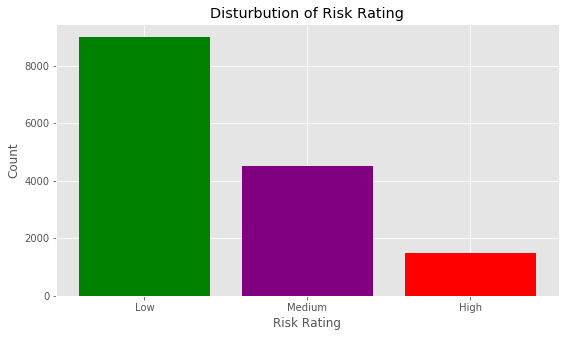

In [67]:
plt.figure(figsize=(9,5))
plt.title('Disturbution of Risk Rating')
plt.bar(df1.index,df1.values,color=['green','purple','red'])
plt.xlabel('Risk Rating')
plt.ylabel('Count')
plt.show()


In [28]:
# Loan disturbution By risk rating
df2=df[['Risk Rating','Loan Amount']]
df2

,Risk Rating,Loan Amount
0,Low,45713.000
1,Medium,33835.000
2,Medium,36623.000
3,Medium,26541.000
4,Low,36528.000
...,...,...
14995,Low,26187.000
14996,Medium,35111.000
14997,High,44369.000
14998,High,32752.000


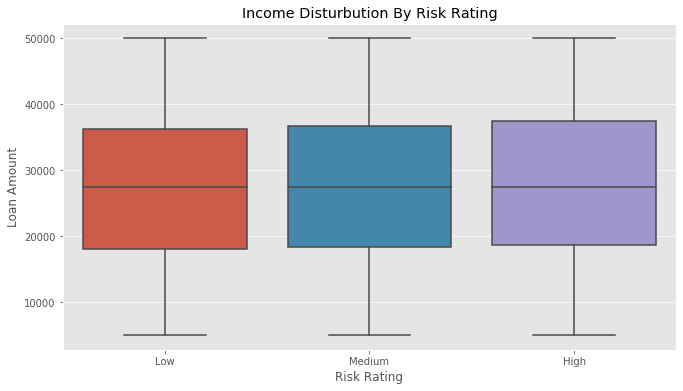

In [29]:
plt.figure(figsize=(11,6))
plt.title('Income Disturbution By Risk Rating')
sns.boxplot(x='Risk Rating',y='Loan Amount',data=df2)
plt.show()

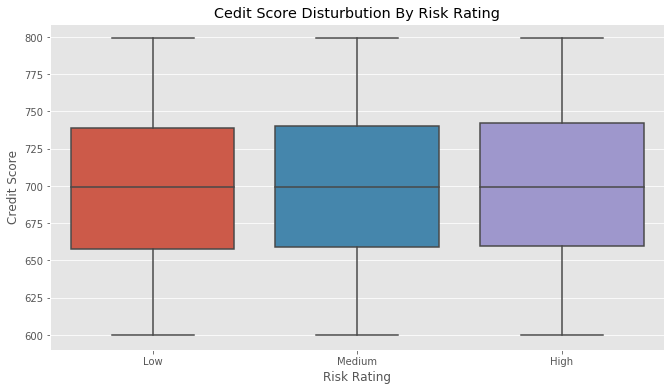

In [30]:
plt.figure(figsize=(11,6))
plt.title('Cedit Score Disturbution By Risk Rating')
sns.boxplot(x=df['Risk Rating'],y=df['Credit Score'])
plt.show()

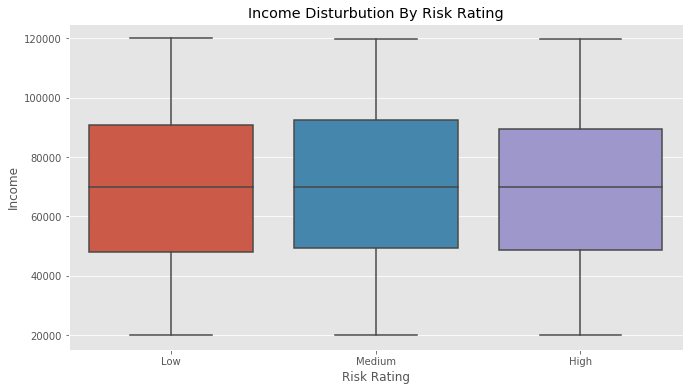

In [31]:
plt.figure(figsize=(11,6))
plt.title('Income Disturbution By Risk Rating')
sns.boxplot(x=df['Risk Rating'],y=df['Income'])
plt.show()

### Q2 how does the income varies by difrrent age groups 


In [32]:
df3=df[['Age Groups','Income']]
df3.head()

,Age Groups,Income
0,46-55 Older Adaults,72799.000
1,56-69 Seniors,69933.399
2,18-25 Youn Adaults,55687.000
3,56-69 Seniors,26508.000
4,18-25 Youn Adaults,49427.000


In [33]:
## Get The Avg of Incoem
df3=df3.groupby('Age Groups').mean().sort_values(by='Income',ascending=False)
df3.reset_index(inplace=True)
df3.head()

,Age Groups,Income
0,26-35 Adaults,70540.272
1,36-45 Mid Age,70351.781
2,56-69 Seniors,69916.517
3,46-55 Older Adaults,69396.409
4,18-25 Youn Adaults,69296.196


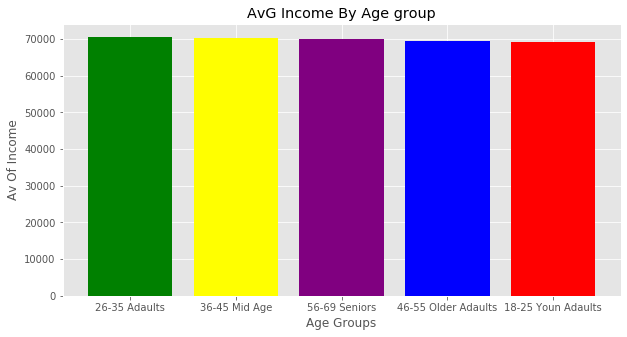

In [34]:
plt.figure(figsize=(10,5))
plt.title('AvG Income By Age group')
plt.bar('Age Groups','Income',data=df3,color=['green','yellow','purple','blue','red'])
plt.xlabel ('Age Groups')
plt.ylabel('Av Of Income')
plt.show()

###  income  DIsturbution By gender 

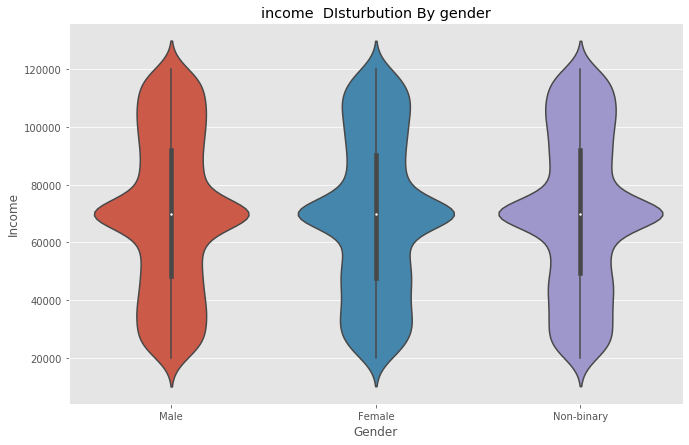

In [35]:
plt.figure(figsize=(11,7))
plt.title('income  DIsturbution By gender')
sns.violinplot(x=df['Gender'],y=df['Income'])
plt.show()

### Relationship Between Credit Score And Loan Amount

In [36]:
df4=df[['Credit Score','Loan Amount']]
df4.head()

,Credit Score,Loan Amount
0,688.000,45713.000
1,690.000,33835.000
2,600.000,36623.000
3,622.000,26541.000
4,766.000,36528.000


In [37]:
df4.dtypes

Credit Score    float64
Loan Amount     float64
dtype: object

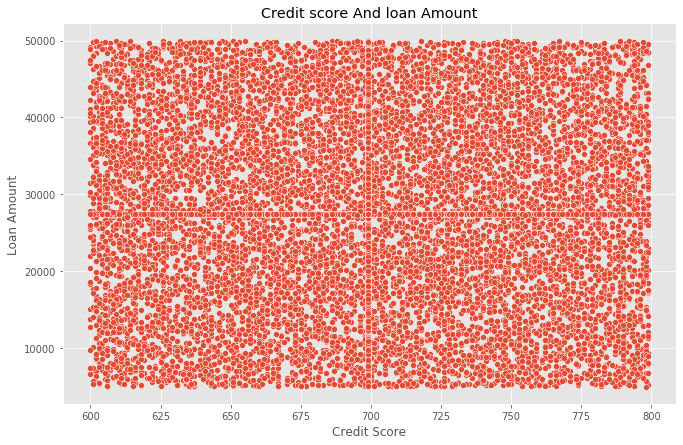

In [38]:
plt.figure(figsize=(11,7))
plt.title('Credit score And loan Amount')
sns.scatterplot(x='Credit Score',y='Loan Amount',data=df4)
plt.show()

## Feautre Enginnering

In [39]:
## CReating The Feauture Loan To Income Ration
df['Loan-To-Income-ratio']=df['Loan Amount']/df['Income']
df['Loan-To-Income-ratio']

0       0.628
1       0.484
2       0.658
3       1.001
4       0.739
         ... 
14995   0.545
14996   0.328
14997   0.959
14998   0.815
14999   0.393
Name: Loan-To-Income-ratio, Length: 15000, dtype: float64

In [40]:
df['Debt-to-Income Ratio']

0       0.154
1       0.149
2       0.362
3       0.455
4       0.143
         ... 
14995   0.318
14996   0.155
14997   0.594
14998   0.478
14999   0.116
Name: Debt-to-Income Ratio, Length: 15000, dtype: float64

## Geographic Infleuence

In [41]:
## Countries With Low Risk Assessment
df6=df[['Country','Risk Rating',]]
df6

,Country,Risk Rating
0,Cyprus,Low
1,Turkmenistan,Medium
2,Luxembourg,Medium
3,Uganda,Medium
4,Namibia,Low
...,...,...
14995,Djibouti,Low
14996,Congo,Medium
14997,Palau,High
14998,Rwanda,High


In [42]:
df7=df6[df6['Risk Rating'].str.contains('High')].groupby('Country').count().sort_values(by='Risk Rating',ascending=False).head(10)
df7

,Risk Rating
Country,
Chile,15
Falkland Islands (Malvinas),15
Bulgaria,13
Philippines,13
Dominica,12
Czech Republic,12
Hong Kong,12
Congo,12
Georgia,11


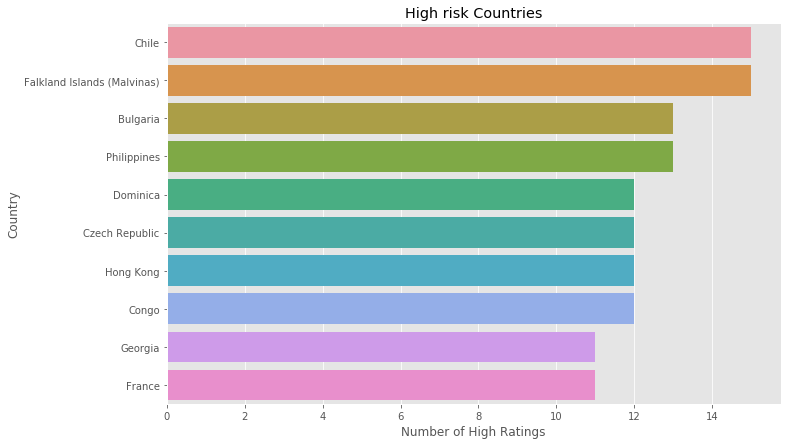

In [43]:
plt.figure(figsize=(11,7))
plt.title('High risk Countries')
sns.barplot(y=df7.index,x='Risk Rating',data=df7,orient='h')
plt.xlabel('Number of High Ratings')
plt.show()


In [44]:
df8=df6[df6['Risk Rating'].str.contains('Low')].groupby('Country').count().sort_values(by='Risk Rating',ascending=False).head(10)

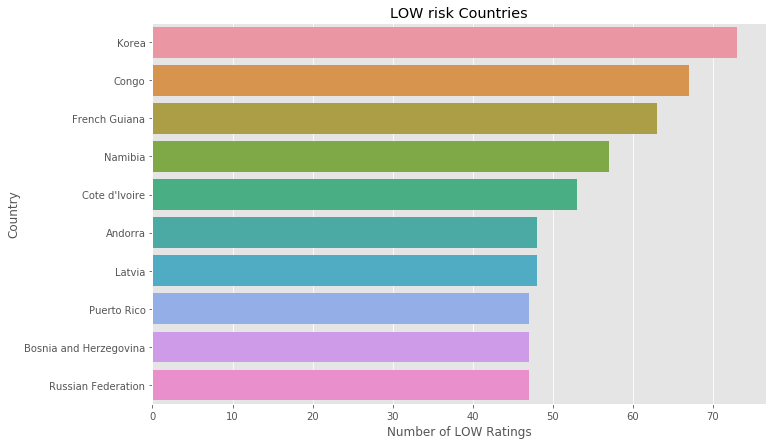

In [45]:
plt.figure(figsize=(11,7))
plt.title('LOW risk Countries')
sns.barplot(y=df8.index,x='Risk Rating',data=df8,orient='h')
plt.xlabel('Number of LOW Ratings')
plt.show()


### What are the Reasons That These Countries Got High and low ratings
#
### Inspect The Income And Credit Score For These Countries


In [46]:
df7.index

Index(['Chile', 'Falkland Islands (Malvinas)', 'Bulgaria', 'Philippines',
       'Dominica', 'Czech Republic', 'Hong Kong', 'Congo', 'Georgia',
       'France'],
      dtype='object', name='Country')

In [47]:
df8.index

Index(['Korea', 'Congo', 'French Guiana', 'Namibia', 'Cote d'Ivoire',
       'Andorra', 'Latvia', 'Puerto Rico', 'Bosnia and Herzegovina',
       'Russian Federation'],
      dtype='object', name='Country')

In [48]:
## Filtering
df9=df[df['Country'].isin(['Korea', 'Congo', 'French Guiana', 'Namibia', 'Cote d Ivoire' ,
       'Andorra', 'Latvia', 'Puerto Rico', 'Bosnia and Herzegovina',
       'Russian Federation'])]

In [49]:
df9=df9[['Country','Income','Credit Score']]
#

In [50]:
df9.groupby('Country').mean().sort_values(by='Income',ascending=False)

,Income,Credit Score
Country,,
Korea,75340.237,699.495
Russian Federation,73426.829,700.663
Bosnia and Herzegovina,72885.819,699.331
Andorra,72500.819,698.890
Puerto Rico,72168.216,707.706
Latvia,72132.093,696.574
Congo,71193.242,694.494
French Guiana,69061.595,701.803
Namibia,65734.316,706.014


### The Avg Credit score For The Low Rating Countries is Very High and Also The Avg Income

In [51]:
df10=df[df['Country'].isin(['Chile', 'Falkland Islands (Malvinas)', 'Bulgaria', 'Philippines',
       'Dominica', 'Czech Republic', 'Hong Kong', 'Congo', 'Georgia',
       'France'])]
df10

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,...,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating,Age Groups,Loan-To-Income-ratio
52,39,Non-binary,PhD,Single,93509.000,703.000,16651.000,Auto,Unemployed,5,...,270036.000,0,North Joshuaborough,MI,Falkland Islands (Malvinas),0.000,0,Medium,36-45 Mid Age,0.178
58,54,Non-binary,PhD,Married,100908.000,764.000,27450.011,Business,Employed,18,...,250753.000,3,East Adam,MH,Georgia,nan,0,Medium,46-55 Older Adaults,0.272
60,36,Male,Bachelor's,Divorced,29868.000,635.000,12521.000,Auto,Employed,17,...,240325.000,2,Wendyshire,ND,Dominica,4.000,0,Low,36-45 Mid Age,0.419
144,66,Female,Master's,Divorced,47785.000,699.109,14137.000,Auto,Employed,16,...,147601.000,1,South Maria,NM,Czech Republic,4.000,0,Medium,56-69 Seniors,0.296
163,34,Female,High School,Widowed,118679.000,731.000,40823.000,Auto,Employed,6,...,63853.000,2,North Jeremy,AS,Georgia,0.000,2,Low,26-35 Adaults,0.344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14951,25,Male,Master's,Divorced,115155.000,611.000,47008.000,Personal,Unemployed,11,...,141797.000,4,Harrisbury,MT,Congo,nan,0,Medium,18-25 Youn Adaults,0.408
14955,40,Non-binary,Master's,Single,58485.000,757.000,9541.000,Business,Self-employed,0,...,99632.000,0,Chadview,ND,France,1.000,0,Low,36-45 Mid Age,0.163
14960,61,Male,High School,Divorced,54129.000,703.000,15715.000,Auto,Self-employed,16,...,102450.000,3,Port Gregory,KY,Congo,1.000,1,Low,56-69 Seniors,0.290
14990,43,Non-binary,Bachelor's,Widowed,69933.399,699.109,18138.000,Personal,Self-employed,12,...,137146.000,2,Roytown,MI,Falkland Islands (Malvinas),0.000,0,Medium,36-45 Mid Age,0.259


In [52]:
df10=df10[['Country','Income','Credit Score']]
df10

,Country,Income,Credit Score
52,Falkland Islands (Malvinas),93509.000,703.000
58,Georgia,100908.000,764.000
60,Dominica,29868.000,635.000
144,Czech Republic,47785.000,699.109
163,Georgia,118679.000,731.000
...,...,...,...
14951,Congo,115155.000,611.000
14955,France,58485.000,757.000
14960,Congo,54129.000,703.000
14990,Falkland Islands (Malvinas),69933.399,699.109


In [53]:
df10.groupby('Country').mean().sort_values(by='Income',ascending=False)

,Income,Credit Score
Country,,
Georgia,74141.758,701.008
Hong Kong,72168.000,695.826
France,71758.337,697.983
Bulgaria,71582.566,696.618
Congo,71193.242,694.494
Chile,70227.146,695.821
Czech Republic,69864.094,696.560
Dominica,68762.834,699.408
Falkland Islands (Malvinas),67284.363,705.225


### Some Countries Have High income and high credit score but still Have High Rating 
#### The Reason for this is many diffrente elements like
- Debt Levels 
- Political Stability
- Inflation


## Education Level And Risk rating

In [54]:
df11=df[['Education Level','Risk Rating']]
df11

,Education Level,Risk Rating
0,PhD,Low
1,Bachelor's,Medium
2,Master's,Medium
3,Bachelor's,Medium
4,Bachelor's,Low
...,...,...
14995,Bachelor's,Low
14996,PhD,Medium
14997,PhD,High
14998,PhD,High


In [55]:
df11=df11.groupby(['Education Level','Risk Rating']).agg({'Risk Rating':'count'})
df11

Risk Rating
Education Level Risk Rating             
Bachelor's      High                 369
                Low                 2308
                Medium              1152
High School     High                 381
                Low                 2246
                Medium              1147
Master's        High                 359
                Low                 2213
                Medium              1065
PhD             High                 391
                Low                 2233
                Medium              1136

In [56]:
df11.rename(columns={'Risk Rating':'Number Of Ratings'},inplace=True)

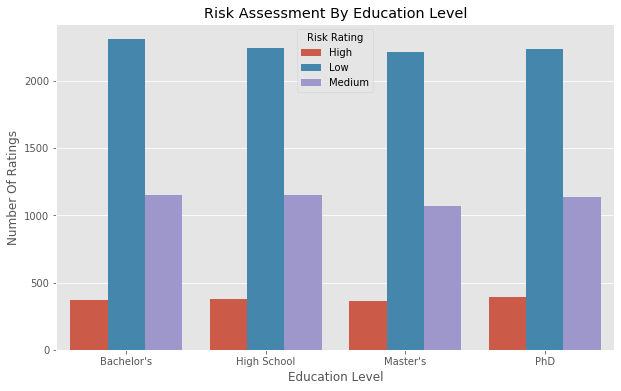

In [57]:
df11.reset_index(inplace=True)
plt.figure(figsize=(10,6))
plt.title('Risk Assessment By Education Level')
sns.barplot(x='Education Level',y='Number Of Ratings',data=df11,hue='Risk Rating')
plt.show()

## Does the increase of years at work affect the Rsik rating

In [58]:
df17=df[['Years at Current Job','Risk Rating']]
df17

,Years at Current Job,Risk Rating
0,19,Low
1,6,Medium
2,8,Medium
3,2,Medium
4,10,Low
...,...,...
14995,2,Low
14996,10,Medium
14997,19,High
14998,12,High


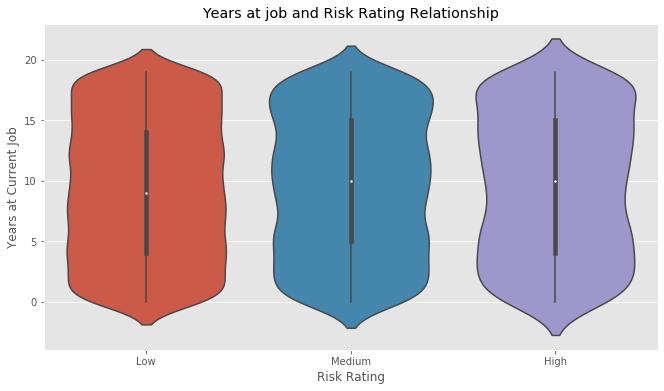

In [59]:
plt.figure(figsize=(11,6))
plt.title('Years at job and Risk Rating Relationship')
sns.violinplot(x=df17['Risk Rating'],y=df17['Years at Current Job'])
plt.show()

## Correlation Analysis

In [60]:
df12=df[['Income','Loan Amount','Credit Score','Age']]
df12=df12.corr()
df12

,Income,Loan Amount,Credit Score,Age
Income,1.000,-0.007,0.011,-0.001
Loan Amount,-0.007,1.000,-0.012,-0.005
Credit Score,0.011,-0.012,1.000,-0.000
Age,-0.001,-0.005,-0.000,1.000


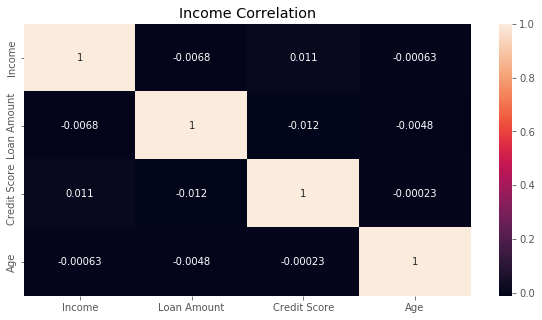

In [61]:
plt.figure(figsize=(10,5))
plt.title('Income Correlation')
sns.heatmap(data=df12,annot=True)
plt.show()

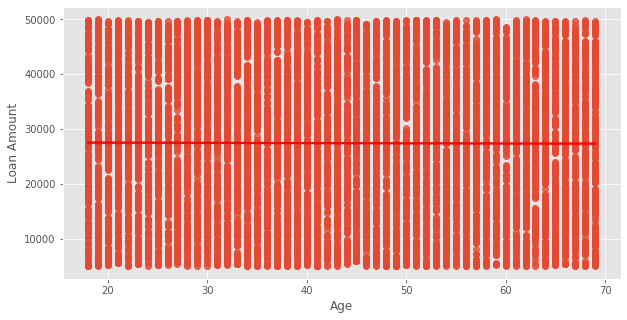

In [62]:
plt.figure(figsize=(10,5))
sns.regplot(x=df['Age'],y=df['Loan Amount'],line_kws={'color':'red'})
plt.show()

In [63]:
df13=df.corr()
df13

,Age,Income,Credit Score,Loan Amount,Years at Current Job,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,Marital Status Change,Loan-To-Income-ratio
Age,1.000,-0.001,-0.000,-0.005,-0.007,-0.002,-0.008,-0.000,0.002,0.013,-0.001
Income,-0.001,1.000,0.011,-0.007,0.007,-0.001,-0.007,0.006,-0.004,0.001,-0.653
Credit Score,-0.000,0.011,1.000,-0.012,-0.002,0.008,0.012,0.006,-0.008,0.002,-0.016
Loan Amount,-0.005,-0.007,-0.012,1.000,-0.005,0.026,-0.010,0.001,0.013,0.010,0.607
Years at Current Job,-0.007,0.007,-0.002,-0.005,1.000,0.010,-0.007,0.008,0.007,-0.010,-0.005
Debt-to-Income Ratio,-0.002,-0.001,0.008,0.026,0.010,1.000,0.017,0.014,-0.009,-0.001,0.014
Assets Value,-0.008,-0.007,0.012,-0.010,-0.007,0.017,1.000,-0.002,0.005,-0.016,0.001
Number of Dependents,-0.000,0.006,0.006,0.001,0.008,0.014,-0.002,1.000,-0.008,-0.002,-0.004
Previous Defaults,0.002,-0.004,-0.008,0.013,0.007,-0.009,0.005,-0.008,1.000,0.004,0.011
Marital Status Change,0.013,0.001,0.002,0.010,-0.010,-0.001,-0.016,-0.002,0.004,1.000,0.009


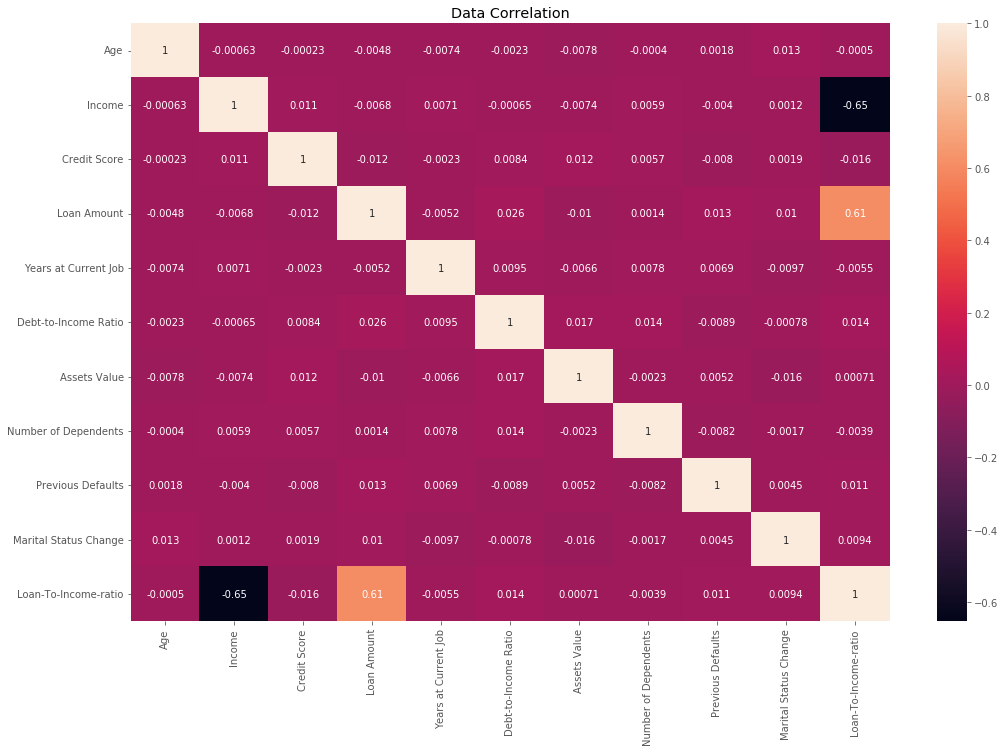

In [64]:
plt.figure(figsize=(17,11))
plt.title('Data Correlation')
sns.heatmap(data=df13,annot=True)
plt.show()

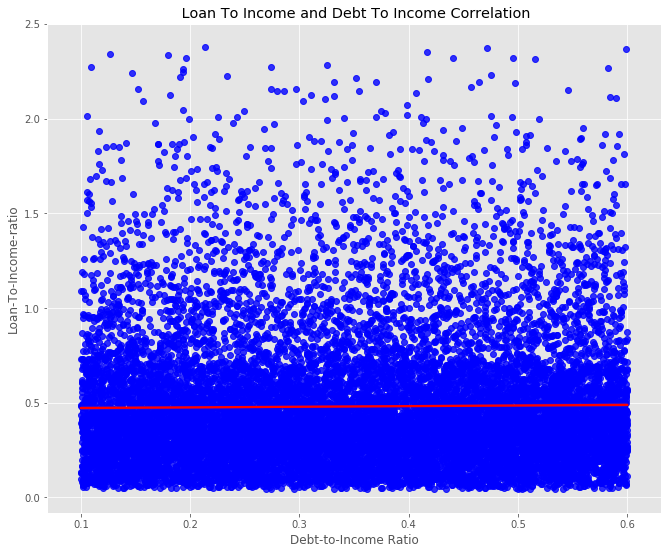

In [65]:
plt.figure(figsize=(11,9))
plt.title(' Loan To Income and Debt To Income Correlation')
sns.regplot(x=df['Debt-to-Income Ratio'],y=df['Loan-To-Income-ratio'],scatter_kws={'color':'blue'},line_kws={'Color':'red'})
plt.show()